# Training Classifiers for ESG Ratings

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)

print(eKonf.__version__)

0.1.31+3.g3e40284.dirty


## Preparing `finsent_kr` dataset

In [2]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group='dataset=simple_auto')
ds_cfg.name = 'finsent_kr'
ds_cfg.datasets = ['analystsent_kr', 'finphrase_kr']
ds_cfg.data_dir = '/workspace/data/datasets/simple'
ds = eKonf.instantiate(ds_cfg)

INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.column:Added a column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:e

In [3]:
ds.COLUMN.INFO

{'keys': {'id': 'id',
  'text': 'text',
  'timestamp': 'timestamp',
  'split': 'split'},
 'columns': {'id': 'id',
  'text': 'text',
  'merge_meta_on': None,
  'timestamp': None},
 'data': {'labels': 'object',
  'id': 'int64',
  'text': 'object',
  'split': 'object',
  'dataset': 'str'},
 'meta': None,
 'timestamp': {'key': None, 'format': None, '_parms_': None},
 'datetime': {'key': None, 'format': None, '_parms_': None},
 'segment_separator': '\\n\\n',
 'sentence_separator': '\\n'}

## Training a polarity classficiation model with `finsent_kr` dataset

In [5]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.name = "esg_polarity"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:Calling train
INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.base:Added s

  0%|          | 0/11372 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 11372 features created from 11372 samples.


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.


Running Epoch 0 of 2:   0%|          | 0/356 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2844 features created from 2844 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.65882829309258, 'acc': 0.8407172995780591, 'eval_loss': 0.3738481896312049}


Running Epoch 1 of 2:   0%|          | 0/356 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 2844 features created from 2844 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6730669413393736, 'acc': 0.8484528832630098, 'eval_loss': 0.37974044555023817}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/esgml/outputs/esgml-esg_polarity/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/3555 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 3555 features created from 3555 samples.


Running Evaluation:   0%|          | 0/112 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,▆█▄▄▄▃▄▃▂▃▁▄▃▃
acc,▁█
eval_loss,▁█
global_step,▁▂▂▃▃▄▄▄▅▅▆▆▇▇██
lr,█▇▇▆▆▅▅▄▄▃▃▂▂▁
mcc,▁█
train_loss,█▁
Training loss,0.34802
acc,0.84845
eval_loss,0.37974
global_step,712


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6552988163412943, 'acc': 0.8388185654008439, 'eval_loss': 0.3973076745335545}


INFO:ekorpkit.ekonf:Calling eval
INFO:ekorpkit.datasets.loader:processing analystsent_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/analystsent_kr/analystsent_kr-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.datasets.loader:processing finphrase_kr
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/finphrase_kr/finphrase_kr-test.csv
INFO:ekorpkit.info.base:Added sp

  0%|          | 0/3555 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 3555 features created from 3555 samples.


  0%|          | 0/112 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'list'>
INFO:ekorpkit.models.transformer.simple:raw_output: [1.0614229440689087, 1.3390781879425049, -2.543381690979004]
INFO:ekorpkit.io.file:Saving dataframe as /workspace/projects/esgml/outputs/esgml-esg_polarity/ekonelectra-base/predictions/esg_polarity_test_predictions.parquet


Accuracy:  0.8323488045007033
Precison:  0.8309464506360114
Recall:  0.8323488045007033
F1 Score:  0.8315852036083365
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.80      0.79      0.80       446
     neutral       0.88      0.89      0.88      2459
    positive       0.68      0.65      0.67       650

    accuracy                           0.83      3555
   macro avg       0.78      0.78      0.78      3555
weighted avg       0.83      0.83      0.83      3555



INFO:ekorpkit.visualize.classification:Confusion matrix: {'_func_': 'confusion_matrix', 'axno': 0, 'secondary_y': False, 'secondary_to': 0, 'display_labels': ['positive', 'neutral', 'negative'], 'matrix_labels': None, 'include_values': True, 'include_percentages': True, 'summary_stats': True, '_parms_': {'cbar': True, 'cmap': 'Blues'}, 'figure': {'xlabel': 'Predicted label', 'ylabel': 'Actual label'}}
INFO:ekorpkit.visualize.plot:Saved figure to /workspace/projects/esgml/outputs/esgml-esg_polarity/ekonelectra-base/predictions/confusion_matrix.png


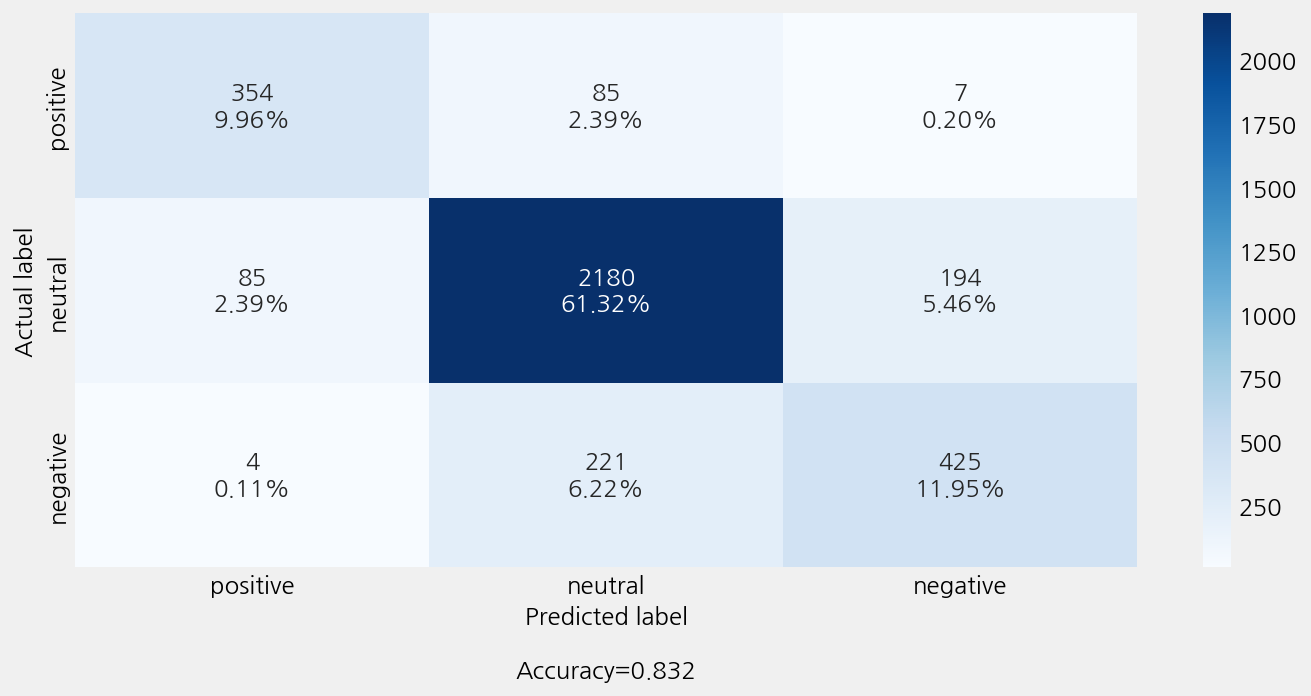

In [4]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.name = "esg_polarity"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg.labels = ['positive','neutral','negative']
model_cfg._method_ = ['eval']
eKonf.instantiate(model_cfg)

## Preparing `esg_topics` dataset

In [5]:
from ekorpkit import eKonf

ds_cfg = eKonf.compose(config_group='dataset')
ds_cfg.name = 'esg_topics'
ds_cfg.data_dir = '/workspace/data/datasets/simple'
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]


['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'G-주주환원', 'S-소비자', 'E-신재생에너지 발전', 'S-사회공헌', 'S-기술혁신', 'S-인적자본', 'E-환경영향', 'E-기후변화', 'S-산업재해/안전관리', 'G-정보공시', 'E-환경혁신', 'S-노조/노사', 'E-원자력발전']


## Training a category classficiation model with `esg_topics` dataset

In [9]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train']
eKonf.instantiate(model_cfg)

INFO:ekorpkit.ekonf:Calling train
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained

  0%|          | 0/10669 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (731 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 11009 features created from 10669 samples.


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.


Running Epoch 0 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.5975648704950577, 'acc': 0.633220910623946, 'eval_loss': 1.2704797481235706}


Running Epoch 1 of 2:   0%|          | 0/345 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled
INFO:simpletransformers.classification.classification_model: 1186 features created from 1186 samples.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6535361031149577, 'acc': 0.6838111298482293, 'eval_loss': 1.079894207025829}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/esgml/outputs/esgml-esg_topics/ekonelectra-base.
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/1318 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▆▅▄▄▃▃▃▂▃▃▁▃
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▃▄▄▄▅▅▆▆▇██
lr,█▇▇▆▆▅▅▄▃▃▂▂▁
mcc,▁█
train_loss,▁█
Training loss,1.22312
acc,0.68381
eval_loss,1.07989
global_step,690


INFO:simpletransformers.classification.classification_model:{'mcc': 0.6369559141371757, 'acc': 0.669195751138088, 'eval_loss': 1.1340322342029838}


INFO:ekorpkit.ekonf:Calling eval
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-train.csv
INFO:ekorpkit.info.base:Added split column [split] with value [train]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-test.csv
INFO:ekorpkit.info.base:Added split column [split] with value [test]
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/simple/esg_topics/esg_topics-dev.csv
INFO:ekorpkit.info.base:Added split column [split] with value [dev]
INFO:ekorpkit.models.transformer.simple:Loaded model from /workspace/projects/esgml/outputs/esgml-esg_topics/ekonelectra-base/best_model
INFO:simpletransformers.classification.classification_model: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_model: Sliding window enabled


  0%|          | 0/1318 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors
INFO:simpletransformers.classification.classification_model: 1318 features created from 1318 samples.


  0%|          | 0/43 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'list'>
INFO:ekorpkit.models.transformer.simple:raw_output: [0.8873550295829773, -1.4042227268218994, -0.9927069544792175, -1.5206907987594604, -0.05941705033183098, -0.9372580051422119, 4.283428192138672, 0.03589600324630737, 0.6752013564109802, 0.7132291197776794, -0.4526979327201843, 0.17319411039352417, 0.8416115045547485, -0.7481359839439392, -0.7303427457809448, -0.49421727657318115]
INFO:ekorpkit.io.file:Saving dataframe as /workspace/projects/esgml/outputs/esgml-esg_topics/ekonelectra-base/predictions/esg_topics_test_predictions.parquet
INFO:ekorpkit.visualize.classification:Confusion matrix: {'_func_': 'confusion_matrix', 'axno': 0, 'secondary_y': False, 'secondary_to': 0, 'display_labels': None, 'matrix_labels': None, 'include_values': False, 'include_percentages': False, 'summary_stats': True, '_parms_': {'cbar': True, 'cmap': 'Blues'}, 'figure': {'xlabel': 'Predicted label', 'ylabel': 'Actual label'}}


Accuracy:  0.669195751138088
Precison:  0.6583205598702675
Recall:  0.669195751138088
F1 Score:  0.6525866906289334
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.49      0.60      0.54        63
     E-신재생에너지 발전       0.55      0.19      0.29        31
         E-원자력발전       1.00      0.42      0.59        19
          E-환경영향       0.46      0.46      0.46        61
          E-환경혁신       0.49      0.44      0.46        52
   G-기업윤리/불공정/소송       0.59      0.58      0.59        91
          G-정보공시       0.33      0.02      0.04        50
          G-주주환원       0.67      0.78      0.72       162
          G-지배구조       0.74      0.81      0.77       172
          S-기술혁신       0.73      0.78      0.75       158
S-기업(공급망)동반성장/상생       0.59      0.41      0.48        39
         S-노조/노사       0.84      0.84      0.84        70
          S-사회공헌       0.82      0.82      0.82        68
    

INFO:ekorpkit.visualize.plot:Saved figure to /workspace/projects/esgml/outputs/esgml-esg_topics/ekonelectra-base/predictions/confusion_matrix.png


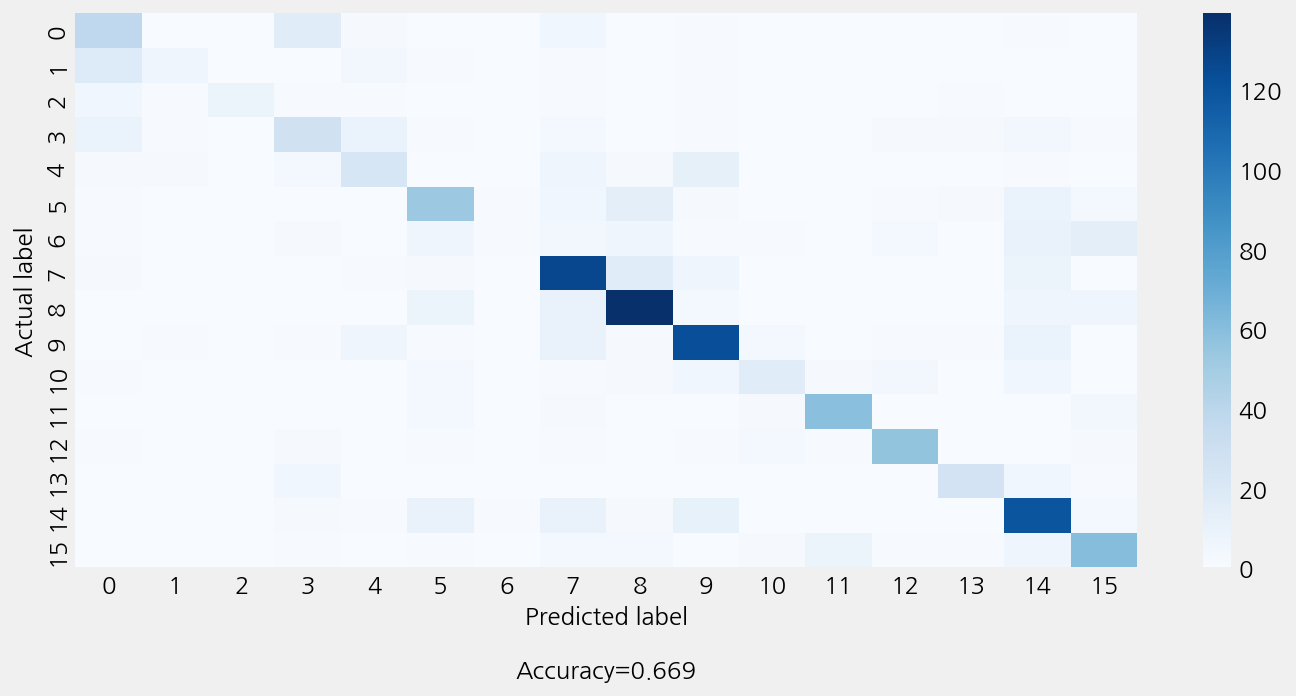

In [6]:
overrides=[
    '+model/transformer=simple_classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose(overrides=overrides, config_group='model/transformer=simple_classification')
model_cfg.name = "esg_topics"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['eval']
model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
eKonf.instantiate(model_cfg)